In [1]:
import os,keras,cv2 #cv2 requiered for selective search on images
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import skimage.io as io
import math
from os import remove
from PIL import Image 
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import NASNetMobile
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import time

36/36 [==============================] - 11s 19ms/step


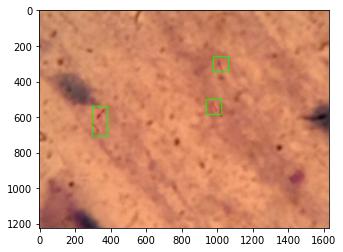

In [3]:
## MArcar solo los bordes

TestImage=[]
Coord=[]
filename='tuberculosis-phone-0031.jpg'
img = cv2.imread(f'./Data/Test/{filename}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Minimo=img.min()

Maximo=img.max()

img= (((img - Minimo)/(Maximo-Minimo))*255)
img = img.astype(np.uint8)
imout = img.copy()



aumento=20
X1 = 23
X2 = 63
Y1 = 23
Y2 = 63 
flag = 0
while flag == 0:
    if X2>1584:
        X1 = 23
        X2 = 63
        Y1=Y1+40      
        Y2=Y2+40
        if Y2>1203:
            flag=1

    timage = imout[(Y1-aumento):(Y2+aumento),(X1-aumento):(X2+aumento)]
    #timage = imout[Y1:Y2,X1:X2]
    resized = cv2.resize(timage, (80,80), interpolation = cv2.INTER_NEAREST)
    #resized=resized/255
    TestImage.append(resized)
    Coord.append((X1,Y1,X2,Y2))
    #img = np.expand_dims(resized, axis=0)
    X1=X1+40      
    X2=X2+40
TestImage_new = np.array(TestImage)/255
Coord_new = np.array(Coord)
TestImage_new.shape
model_final=load_model('rcnn_MNasNet_2.h5')
out= model_final.predict(TestImage_new, verbose=1)
imout=imout*0
for i in range(out.shape[0]) :
    
    if out[i][0] > 0.5:# and z<100: ## la clase 0 entendemos que esnodulo v## en el otro es el 1
        cv2.rectangle(imout, (Coord_new[i][0], Coord_new[i][1]), (Coord_new[i][2], Coord_new[i][3]), (0, 255, 0),3, cv2.LINE_AA)

gray = cv2.cvtColor(imout, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)

cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4    
for c in cnts:
  epsilon = 0.01*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  x,y,w,h = cv2.boundingRect(approx)

  cv2.rectangle(img, (int(x), int(y)), (int(x+w),int(y+h)), (0, 255, 0),3, cv2.LINE_AA)
plt.figure()
plt.imshow(img)
fin =time.time()